In [14]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Завантаження датасету з Kaggle
path = kagglehub.dataset_download("l3llff/banana")

# Читаємо правильний файл
df = pd.read_csv(f"{path}/banana_quality.csv")

print(df.sample(5).T, "\n")
print(f"List of column names:", df.columns, "\n")

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset")





Using Colab cache for faster access to the 'banana' dataset.
                 2518      1090      1092      6226      1246
Size        -0.004034 -2.183317 -1.305765 -1.023441 -4.893459
Weight      -4.074786  0.297786  1.671941 -4.049978  1.392662
Sweetness   -0.358955  4.870303  1.960902 -2.181807  2.628049
Softness    -1.527754  1.720605 -0.918185  1.714328 -1.059015
HarvestTime -1.108224 -2.598812 -2.227462 -2.150836 -0.988983
Ripeness     3.136861 -1.941741  1.209272 -2.771844  1.024747
Acidity     -1.044918  2.588655  1.819575 -0.627543  2.849716
Quality           Bad      Good      Good       Bad      Good 

List of column names: Index(['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object') 

There are 8000 rows and 8 columns in the dataset


In [15]:
df.info()
df.isnull().sum() / len(df) * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


,0
Size,0.0
Weight,0.0
Sweetness,0.0
Softness,0.0
HarvestTime,0.0
Ripeness,0.0
Acidity,0.0
Quality,0.0


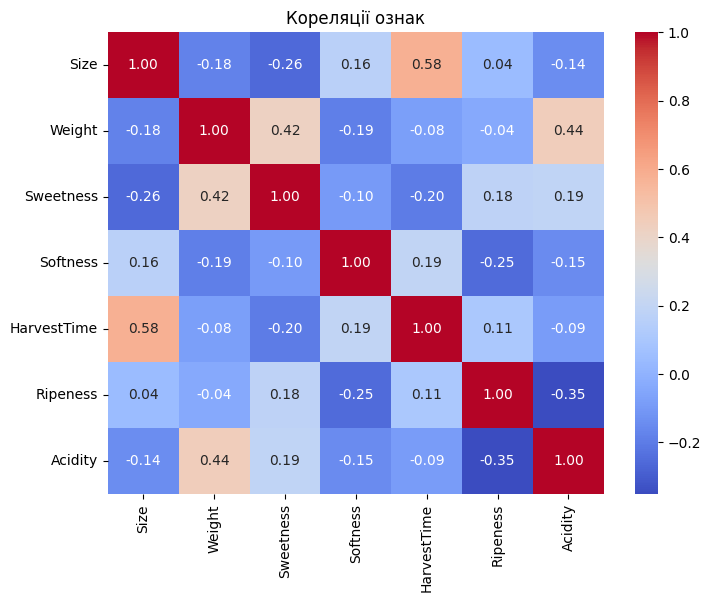

In [16]:
# --------------------------
# 1. Heatmap кореляцій
# --------------------------
plt.figure(figsize=(8, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляції ознак")
plt.show()

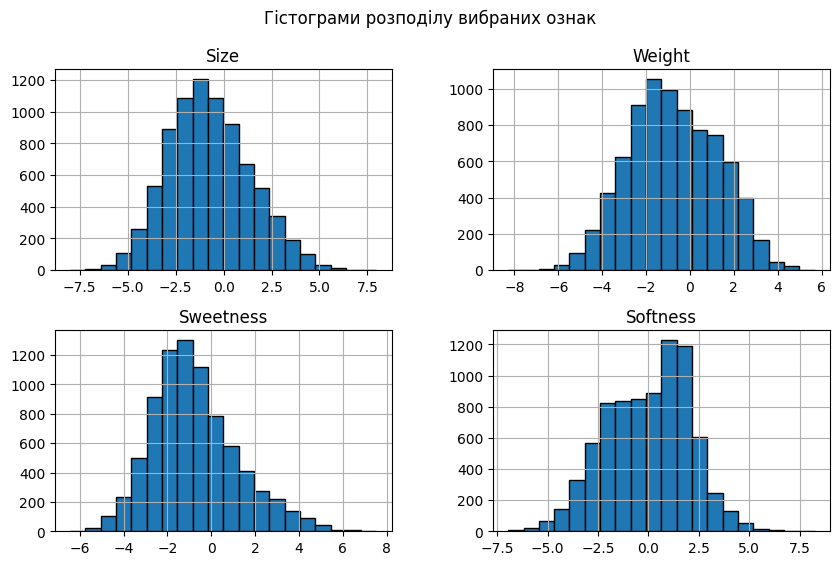

In [17]:
# --------------------------
# 2. Гістограми розподілу ознак
# --------------------------
features = df.select_dtypes(include=['float64', 'int64']).columns[:4]

df[features].hist(figsize=(10, 6), bins=20, edgecolor="black")
plt.suptitle("Гістограми розподілу вибраних ознак")
plt.show()

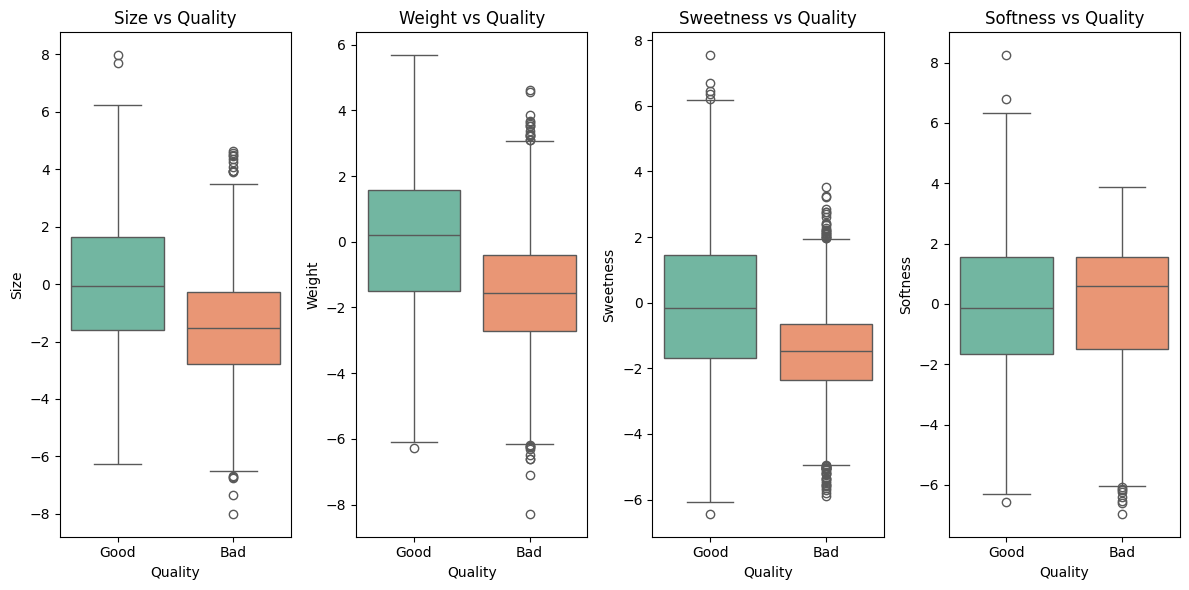

In [18]:
# --------------------------
# 3. Boxplot-и відносно цільової змінної
# --------------------------


target = 'Quality'  # правильна назва цільової змінної

plt.figure(figsize=(12, 6))
for i, col in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    sns.boxplot(x=target, y=col, data=df, hue=target, palette="Set2", legend=False)
    plt.title(f"{col} vs {target}")
plt.tight_layout()
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1) Вибираємо ознаки та ціль
feature_cols = df.columns[:-1]   # всі колонки, крім останньої (Quality)
target_col = df.columns[-1]      # остання колонка = ціль

X = df[feature_cols]  # ознаки
y = df[target_col]    # цільова змінна

# 2) Нормалізація
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) Перетворимо назад у DataFrame для зручності
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)

# 4) Додаємо колонку target
X_scaled_df[target_col] = y

# 5) Перевірка
print("Перші 5 рядків нормалізованого датасету:")
print(X_scaled_df.head())




Перші 5 рядків нормалізованого датасету:
       Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -0.551136  0.609729   1.975051 -0.705896     0.523951  0.782568  0.114491   
1 -0.778107  0.619052   0.573385 -1.201237    -0.070585  0.608493  0.130204   
2  0.182685  1.113298   1.200347 -1.273895     0.052101  1.092419  0.618577   
3 -0.056521  1.154485   1.365182 -0.609815    -0.127716  0.516472  0.204566   
4  0.655290  1.031953   0.383797 -0.578798    -0.340291  0.140598  1.222556   

  Quality  
0    Good  
1    Good  
2    Good  
3    Good  
4    Good  


In [20]:
# --------------------------
# 3. Навчання класифікаторів
# --------------------------
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df.drop('Quality', axis=1), X_scaled_df['Quality'], test_size=0.2, random_state=42)


# ----- kNN з підбором k -----
knn_params = {'n_neighbors': list(range(1, 11))}
knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn.fit(X_train, y_train)
print("kNN best params:", knn.best_params_)

# ----- Decision Tree -----
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# ----- SVM з GridSearch для C і gamma -----
svm_params = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.01, 0.1, 1], 'kernel': ['rbf']}
svm = GridSearchCV(SVC(), svm_params, cv=5)
svm.fit(X_train, y_train)
print("SVM best params:", svm.best_params_)

# ----- Random Forest -----
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# ----- AdaBoost -----
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train, y_train)

# --------------------------
# 4. Вибір найкращої моделі
# --------------------------
models = {
    'kNN': knn,
    'Decision Tree': dt,
    'SVM': svm,
    'Random Forest': rf,
    'AdaBoost': ab
}

best_acc = 0
best_model_name = None
best_model = None

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = np.mean(y_pred == y_test)
    print(f"{name} accuracy: {acc:.4f}")
    if acc > best_acc:
        best_acc = acc
        best_model_name = name
        best_model = model

print(f"Найкраща модель: {best_model_name} з точністю {best_acc:.4f}")

# --------------------------
# 5. Метрики для найкращої моделі
# --------------------------
y_pred_best = best_model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_best))

kNN best params: {'n_neighbors': 7}
SVM best params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
kNN accuracy: 0.9781
Decision Tree accuracy: 0.9387
SVM accuracy: 0.9844
Random Forest accuracy: 0.9750
AdaBoost accuracy: 0.8925
Найкраща модель: SVM з точністю 0.9844
Classification Report:

              precision    recall  f1-score   support

         Bad       0.99      0.98      0.98       781
        Good       0.98      0.99      0.98       819

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600

Confusion Matrix:

[[766  15]
 [ 10 809]]
